In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import binned_statistic
import math

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
cvfolds = 54
pred_y = np.load("bestbilstm.npy")
#pred_y = np.load("myrawlstm_cv54_stateless.npy")
seqlen = pred_y.shape[1]
#seqlen = 100
pred_y = pred_y.reshape((-1, 2))
print pred_y.shape, seqlen, np.min(pred_y), np.max(pred_y)

(5400, 2) 100 -3.00288581848 106.482303619


In [4]:
y = np.loadtxt("1_16_London_RNN_data_2x400_at19_bin100-RAW_pos.dat")
#y = np.load("London_RNN_data_2x1000_at50_bin100-RAW_pos.npy")
y = y[:pred_y.shape[0]]
print y.shape, np.min(y), np.max(y)

(5400, 2) 4.464 107.171


In [5]:
def mse(y, t, axis=2):
    return (np.square(y - t).mean(axis=axis).mean())

def mean_distance(y, t, axis=2):
    return np.mean(np.sqrt(np.sum((y - t)**2, axis=axis)))

In [6]:
print mse(pred_y[:1100], y[:1100], axis=1), mean_distance(pred_y[:1100], y[:1100], axis=1)
print mse(pred_y[4400:], y[4400:], axis=1), mean_distance(pred_y[4400:], y[4400:], axis=1)

41.0996957642 7.75109117645
33.9006053109 6.9266643378


In [7]:
errors = np.sqrt(np.sum((pred_y - y)**2, axis=1))
print np.mean(errors), errors.shape

6.89514757058 (5400,)


In [8]:
meanerrors = np.mean(np.reshape(errors, (cvfolds, -1)), axis=1)
print meanerrors, meanerrors.shape

[  8.90755314   7.61004121   7.29330066  11.41172445   6.50756011
   5.86447468   9.33102902   8.43308267   5.05250149   9.3115338
   5.53920171   6.12910954   6.15731047  15.38290266   6.47832265
   4.60758839   6.23062605   5.72967821   5.9012468    8.31900162
   5.12159581   7.11853898   4.72141586   6.00179047  11.2159098
   5.33987633   5.66937251   7.2886662    7.2443724    6.72344383
   5.84309576   4.84280331   6.37245479   5.54179288   7.03803617
   5.72263209   4.73541165   7.17097655   6.90889246   6.88172496
   5.72471864   6.8042736    6.80179739   6.03994365   5.17734658
   5.87437334   8.99858018   3.95601472   6.42291041   9.05305533
   5.84324552   7.67745532   6.33498304   9.92867894] (54,)


In [9]:
plotmeanerrors = np.repeat(meanerrors, errors.shape[0] / cvfolds)
print plotmeanerrors.shape, plotmeanerrors[:20]

(5400,) [ 8.90755314  8.90755314  8.90755314  8.90755314  8.90755314  8.90755314
  8.90755314  8.90755314  8.90755314  8.90755314  8.90755314  8.90755314
  8.90755314  8.90755314  8.90755314  8.90755314  8.90755314  8.90755314
  8.90755314  8.90755314]


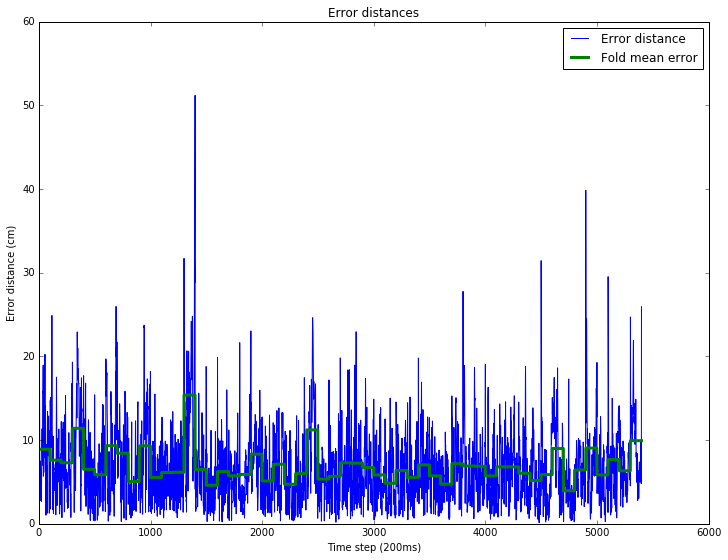

In [10]:
plt.figure(figsize=(12,9))
plt.plot(errors)
plt.plot(plotmeanerrors, linewidth=3);
plt.legend(("Error distance", "Fold mean error"))
plt.title("Error distances")
plt.ylabel("Error distance (cm)")
plt.xlabel("Time step (200ms)")

(54, 100)
(100,)


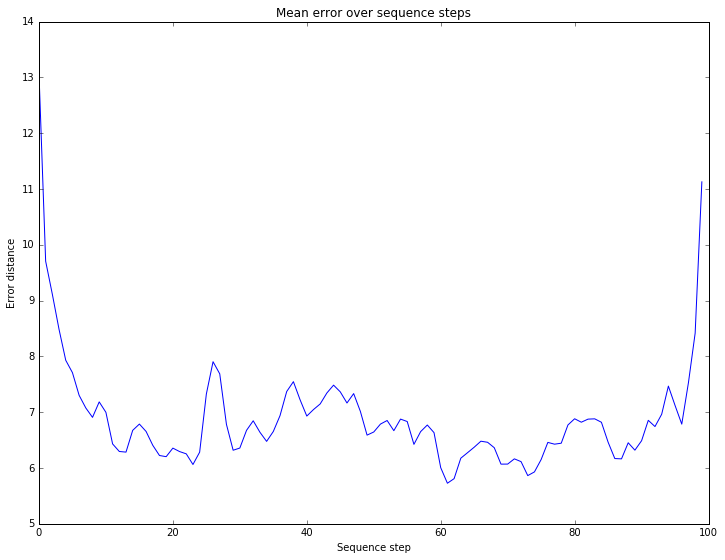

In [11]:
seqerrors = np.reshape(errors, (-1,100))
print seqerrors.shape
meanerrors = np.mean(seqerrors, axis=0)
print meanerrors.shape
plt.figure(figsize=(12,9))
plt.plot(meanerrors);
plt.title("Mean error over sequence steps")
plt.ylabel("Error distance")
plt.xlabel("Sequence step")

In [12]:
pred_y2 = np.load("lstm_cv54_stateful.npy").reshape((-1, 2))
print pred_y2.shape
#y2 = np.load("London_RNN_data_2x1000_at50_bin100-RAW_pos.npy")
y2 = np.loadtxt("London_data_2x1000Center_bin100_pos.dat") / 3.5
errors2 = np.sqrt(np.sum((pred_y2 - y2)**2, axis=1))
print np.mean(errors2), errors2.shape

(5400, 2)
9.83991469004 (5400,)


(54, 100)
(100,)


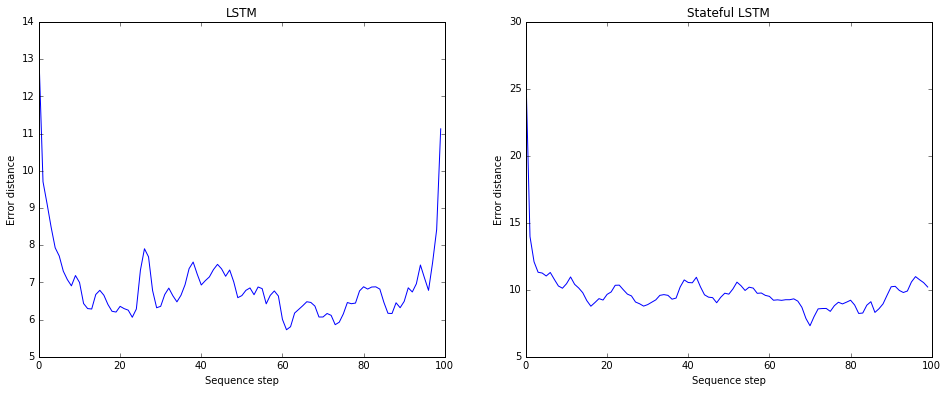

In [13]:
seqerrors2 = np.reshape(errors2, (-1,100))
print seqerrors2.shape
meanerrors2 = np.mean(seqerrors2, axis=0)
print meanerrors2.shape
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(meanerrors);
plt.title("LSTM")
plt.ylabel("Error distance")
plt.xlabel("Sequence step")
plt.subplot(1,2,2)
plt.plot(meanerrors2);
plt.title("Stateful LSTM")
plt.ylabel("Error distance")
plt.xlabel("Sequence step")
#plt.ylim([8, 26])

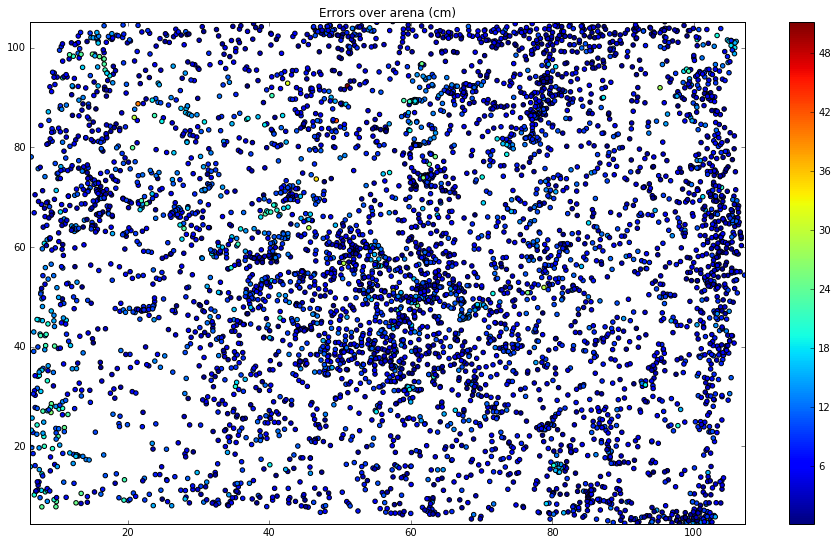

In [14]:
plt.figure(figsize=(16,9))
plt.scatter(y[:,0], y[:,1],c=errors)
plt.xlim([np.min(y[:,0]), np.max(y[:,0])])
plt.ylim([np.min(y[:,1]), np.max(y[:,1])])
plt.colorbar();
plt.title("Errors over arena (cm)")

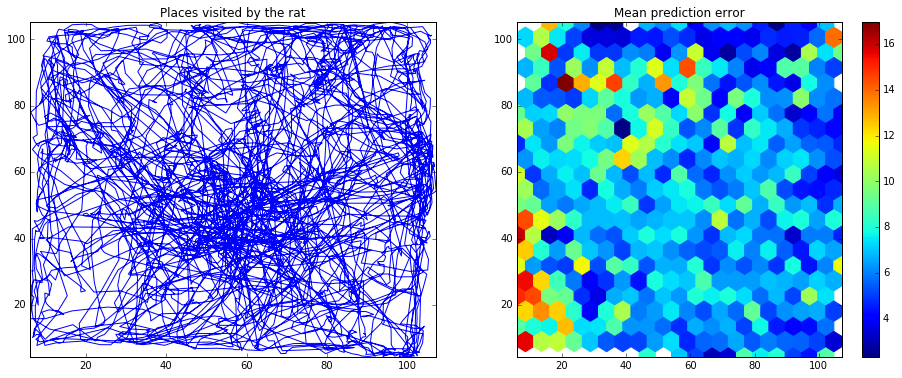

In [15]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(y[:,0], y[:,1]);
plt.title("Places visited by the rat")
plt.xlim([np.min(y[:,0]), np.max(y[:,0])])
plt.ylim([np.min(y[:,1]), np.max(y[:,1])])
plt.subplot(1,2,2)
plt.title("Mean prediction error")
plt.hexbin(y[:,0], y[:,1],C=errors, gridsize=20)
plt.colorbar();

In [16]:
seqy = np.reshape(y, (-1, 100, 2))
print seqy.shape
diff = seqy[:,1:,:] - seqy[:,:-1,:]
print diff.shape
diff  = np.reshape(diff, (-1, 2))
print diff.shape

differrors = np.reshape(seqerrors[:,1:], (-1))
print differrors.shape

(54, 100, 2)
(54, 99, 2)
(5346, 2)
(5346,)


In [17]:
dists = np.sqrt(np.sum(diff**2, axis=1))
print dists.shape, np.mean(dists)

(5346,) 3.75711041817


101 100


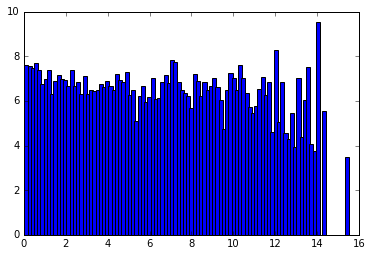

In [18]:
nb_bins = 100
statistic, bin_edges, binnumber = binned_statistic(dists, differrors, statistic='mean', bins=nb_bins)
print len(bin_edges), len(statistic)
plt.bar(bin_edges[:-1], statistic,width=0.2);

In [19]:
angles = np.arctan2(diff[:,1], diff[:,0])
print angles.shape

(5346,)


In [20]:
nb_bins = 100
statistic, bin_edges, binnumber = binned_statistic(angles, differrors, statistic='mean', bins=nb_bins)
print len(bin_edges), len(statistic)

101 100


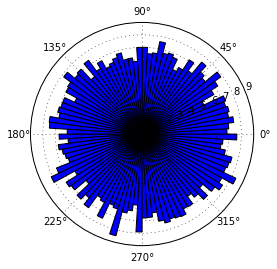

In [21]:
plt.gca(projection='polar')
plt.bar(bin_edges[:-1], statistic, width=2*math.pi/nb_bins);